### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import plotly.express as px
from sklearn.decomposition import KernelPCA
from sklearn.cluster import KMeans
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

### Exploratory Data Analysis

In [2]:
# load data
df = pd.read_csv('grain_size.csv')

# normalize data for components to sum up to 1
grain_sizes = ['Medium sand and above %', 'Fine sand %', 'Very fine sand %', 'Coarse silt %', 'Medium silt %', 'Fine silt %', 'Very fine silt %', 'Clay %']
df[grain_sizes] = df[grain_sizes].div(df[grain_sizes].sum(axis=1), axis=0)
df

,Sample,Medium sand and above %,Fine sand %,Very fine sand %,Coarse silt %,Medium silt %,Fine silt %,Very fine silt %,Clay %
0,B7-1,0.310954,0.136023,0.000616,0.149574,0.074120,0.019095,0.055538,0.254081
1,M-12,0.091074,0.110094,0.536580,0.033612,0.022542,0.018718,0.019523,0.167858
2,B8-3,0.312426,0.102889,0.102459,0.084309,0.084309,0.061218,0.039738,0.212652
3,B3-4,0.149780,0.214191,0.368674,0.050097,0.031183,0.021470,0.034761,0.129844
4,B1-1,0.066137,0.061907,0.404560,0.033017,0.030953,0.039723,0.039208,0.324494
5,B1-2,0.080992,0.069525,0.315909,0.035124,0.041839,0.035640,0.054236,0.366736
6,B1-3,0.058019,0.047793,0.417274,0.034933,0.047084,0.057716,0.044046,0.293135
7,B2-1,0.072957,0.044454,0.443198,0.027783,0.044248,0.025725,0.043733,0.297901
8,B3-3,0.106133,0.125955,0.560913,0.032005,0.045943,0.082593,0.016519,0.029940


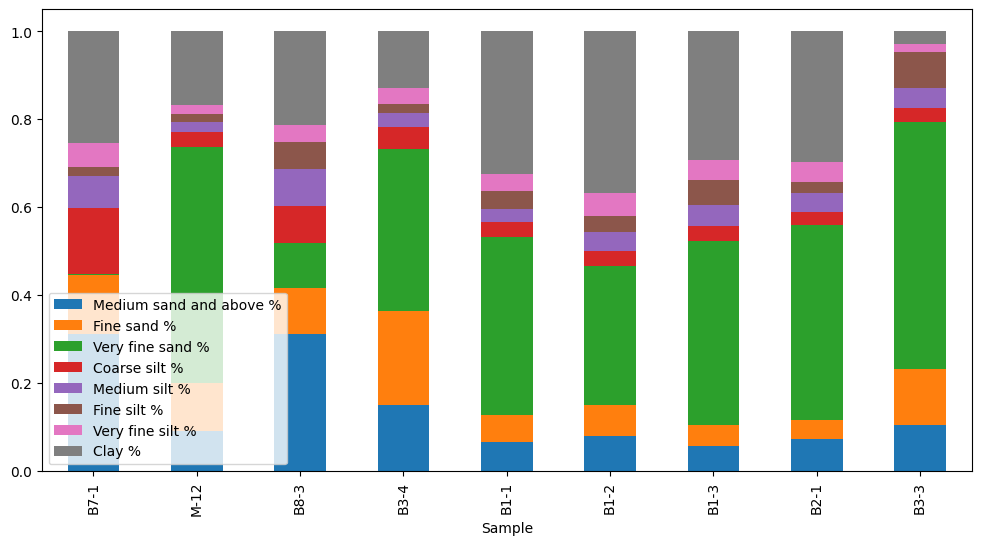

In [3]:
#create stacked bar chart
df.set_index('Sample').plot(kind='bar', stacked=True, figsize=(12,6))
plt.show()

In [4]:
# drop column with sample name
df = df.drop(columns=['Sample'])

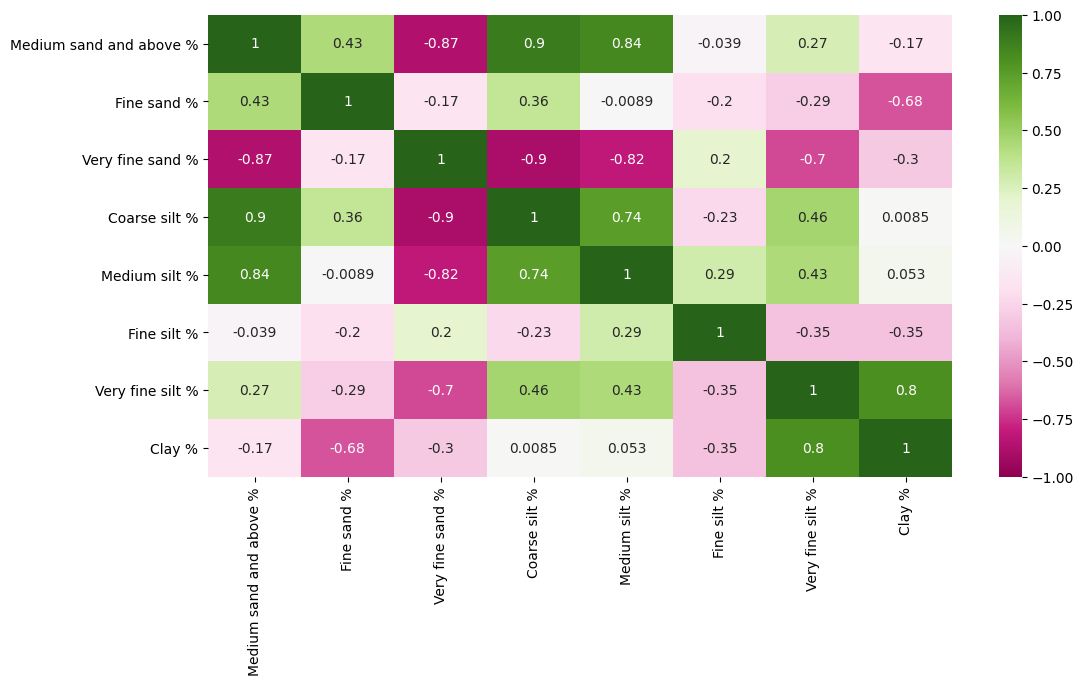

In [5]:
# find correlation between features 
plt.subplots(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, cmap='PiYG')
plt.show()

In [6]:
# list highly correlated features in descending order
corr = df.corr().abs().stack().reset_index().sort_values(0, ascending=False)
corr['pair_column'] = list(zip(corr.level_0, corr.level_1))
corr.set_index(['pair_column'], inplace=True)
corr.drop(columns=['level_0', 'level_1'], inplace=True)
corr.columns = ['correlation']
corr.drop_duplicates(inplace=True)
corr = corr[(corr.correlation < 1) & (corr.correlation >= 0.7)]
corr

,correlation
pair_column,
"(Medium sand and above %, Coarse silt %)",0.898327
"(Coarse silt %, Very fine sand %)",0.895003
"(Very fine sand %, Medium sand and above %)",0.868605
"(Medium sand and above %, Medium silt %)",0.840019
"(Very fine sand %, Medium silt %)",0.817385
"(Clay %, Very fine silt %)",0.804899
"(Medium silt %, Coarse silt %)",0.743386
"(Very fine sand %, Very fine silt %)",0.700202


### Generate new features

In [7]:
grain_sizes = ['Medium sand and above %', 'Fine sand %', 'Very fine sand %', 'Coarse silt %', 'Medium silt %', 'Fine silt %', 'Very fine silt %', 'Clay %']
sand = ['Medium sand and above %', 'Fine sand %', 'Very fine sand %']
silt = ['Coarse silt %', 'Medium silt %', 'Fine silt %', 'Very fine silt %']
clay =  ['Clay %']

df['sand_total %'] = df[sand].sum(axis=1)
df['silt_total %'] = df[silt].sum(axis=1)
df['sand/silt'] = df['sand_total %']/df['silt_total %']
df['sand/clay'] = df['sand_total %']/df['Clay %']
df['silt/clay'] = df['silt_total %']/df['Clay %']
df['mean'] = df[grain_sizes].mean(axis=1)
df['std'] = df[grain_sizes].std(axis=1)
df['median'] = df[grain_sizes].median(axis=1)
df['skewness'] = df[grain_sizes].skew(axis=1)
df['kurtosis'] = df[grain_sizes].kurt(axis=1)
df

,Medium sand and above %,Fine sand %,Very fine sand %,Coarse silt %,Medium silt %,Fine silt %,Very fine silt %,Clay %,sand_total %,silt_total %,sand/silt,sand/clay,silt/clay,mean,std,median,skewness,kurtosis
0,0.310954,0.136023,0.000616,0.149574,0.074120,0.019095,0.055538,0.254081,0.447593,0.298327,1.500344,1.761616,1.174141,0.125,0.110884,0.105071,0.701053,-0.661566
1,0.091074,0.110094,0.536580,0.033612,0.022542,0.018718,0.019523,0.167858,0.737748,0.094395,7.815565,4.395084,0.562350,0.125,0.174797,0.062343,2.337610,5.798956
2,0.312426,0.102889,0.102459,0.084309,0.084309,0.061218,0.039738,0.212652,0.517775,0.269574,1.920717,2.434848,1.267677,0.125,0.091384,0.093384,1.552722,1.827374
3,0.149780,0.214191,0.368674,0.050097,0.031183,0.021470,0.034761,0.129844,0.732645,0.137512,5.327881,5.642520,1.059055,0.125,0.120263,0.089970,1.325357,1.458380
4,0.066137,0.061907,0.404560,0.033017,0.030953,0.039723,0.039208,0.324494,0.532604,0.142901,3.727076,1.641335,0.440382,0.125,0.149922,0.050815,1.496321,0.513469
5,0.080992,0.069525,0.315909,0.035124,0.041839,0.035640,0.054236,0.366736,0.466426,0.166839,2.795666,1.271831,0.454930,0.125,0.135163,0.061880,1.423896,0.193460
6,0.058019,0.047793,0.417274,0.034933,0.047084,0.057716,0.044046,0.293135,0.523086,0.183779,2.846281,1.784456,0.626943,0.125,0.146094,0.052754,1.644487,1.360539
7,0.072957,0.044454,0.443198,0.027783,0.044248,0.025725,0.043733,0.297901,0.560609,0.141490,3.962182,1.881865,0.474957,0.125,0.157104,0.044351,1.658475,1.553871
8,0.106133,0.125955,0.560913,0.032005,0.045943,0.082593,0.016519,0.029940,0.793000,0.177060,4.478717,26.486207,5.913793,0.125,0.180427,0.064268,2.572117,6.890768


### Scale Data

In [8]:
transformer = StandardScaler()
df_scaled = pd.DataFrame(transformer.fit_transform(df), columns=df.columns)
df_scaled

,Medium sand and above %,Fine sand %,Very fine sand %,Coarse silt %,Medium silt %,Fine silt %,Very fine silt %,Clay %,sand_total %,silt_total %,sand/silt,sand/clay,silt/clay,mean,std,median,skewness,kurtosis
0,1.796420,0.680061,-1.979731,2.549459,1.427622,-0.997411,1.332897,0.232124,-1.173753,1.933978,-1.276879,-0.457828,-0.094779,0.000000e+00,-1.076288,1.769165,-1.803743,-1.153365
1,-0.496945,0.170384,1.057051,-0.524046,-1.278855,-1.015200,-1.499360,-0.625285,1.215002,-1.373930,2.200328,-0.112749,-0.465697,-1.387779e-17,1.233086,-0.351577,1.358073,1.541044
2,1.811778,0.028769,-1.402684,0.819649,1.962287,0.992236,0.090345,-0.179848,-0.595967,1.467585,-1.045418,-0.369610,-0.038070,0.000000e+00,-1.780873,1.189097,-0.158324,-0.115334
3,0.115368,2.216553,0.105691,-0.087111,-0.825435,-0.885200,-0.301021,-1.003298,1.172991,-0.674548,0.830591,0.050710,-0.164554,-1.387779e-17,-0.737387,1.019659,-0.597592,-0.269226
4,-0.757037,-0.776794,0.309024,-0.539811,-0.837480,-0.023028,0.048638,0.932324,-0.473880,-0.587121,-0.050824,-0.473589,-0.539645,-2.775558e-17,0.334254,-0.923727,-0.267291,-0.663308
5,-0.602101,-0.627050,-0.193276,-0.483965,-0.266277,-0.215883,1.230437,1.352372,-1.018707,-0.198839,-0.563665,-0.522007,-0.530824,0.000000e+00,-0.199032,-0.374536,-0.407215,-0.796770
6,-0.841704,-1.054225,0.381060,-0.489022,0.008947,0.826812,0.429144,0.620482,-0.552238,0.075939,-0.535796,-0.454835,-0.426536,0.000000e+00,0.195952,-0.827486,0.018964,-0.310031
7,-0.685900,-1.119858,0.527946,-0.678520,-0.139871,-0.684208,0.404538,0.667875,-0.243324,-0.610014,0.078627,-0.442071,-0.518682,-2.775558e-17,0.593784,-1.244574,0.045989,-0.229401
8,-0.339880,0.482161,1.194918,-0.566633,-0.050938,2.001883,-1.735619,-1.996745,1.669877,-0.033051,0.363035,2.781981,2.778788,0.000000e+00,1.436503,-0.256021,1.811139,1.996392


### PCA

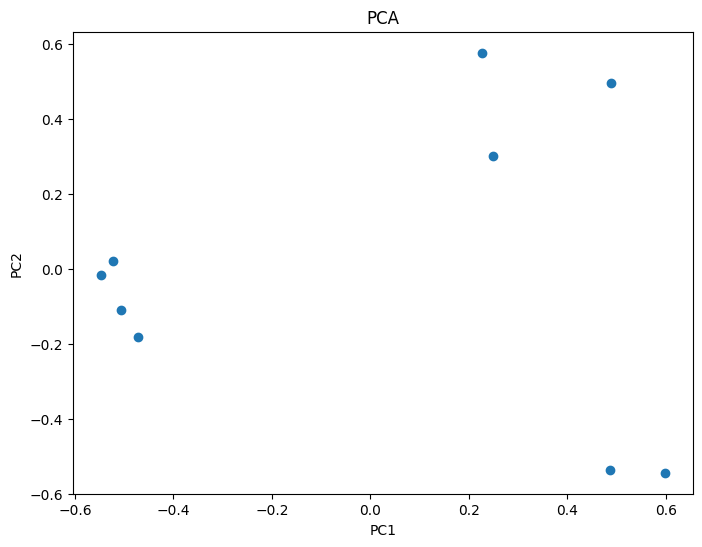

In [9]:
transformer = KernelPCA(kernel='rbf')
X_transformed = transformer.fit_transform(df_scaled)
fig, ax = plt.subplots(figsize = (8, 6))
plt.scatter(X_transformed[:, 0], X_transformed[:, 1])
plt.title('PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [10]:
explained_variance_ratio = [transformer.eigenvalues_]/sum(transformer.eigenvalues_)
pca_cum_var = np.cumsum(explained_variance_ratio)

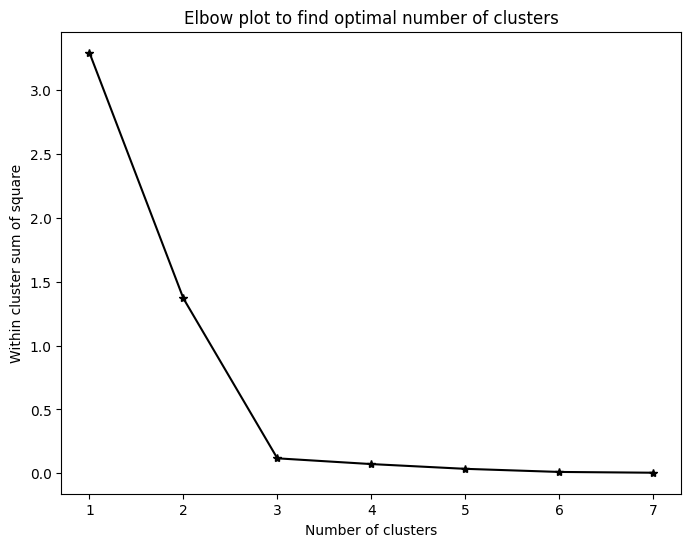

In [11]:
# elbow method to determine number of clusters 
wcss = []
for i in range (1, 8):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=5, random_state=0)
    kmeans.fit(X_transformed[:, :2])
    wcss.append(kmeans.inertia_)


plt.figure(figsize = (8, 6))
plt.plot(range(1,8), wcss, marker="*", c="black")
plt.title("Elbow plot to find optimal number of clusters")
plt.xlabel("Number of clusters")
plt.ylabel("Within cluster sum of square")
plt.show()

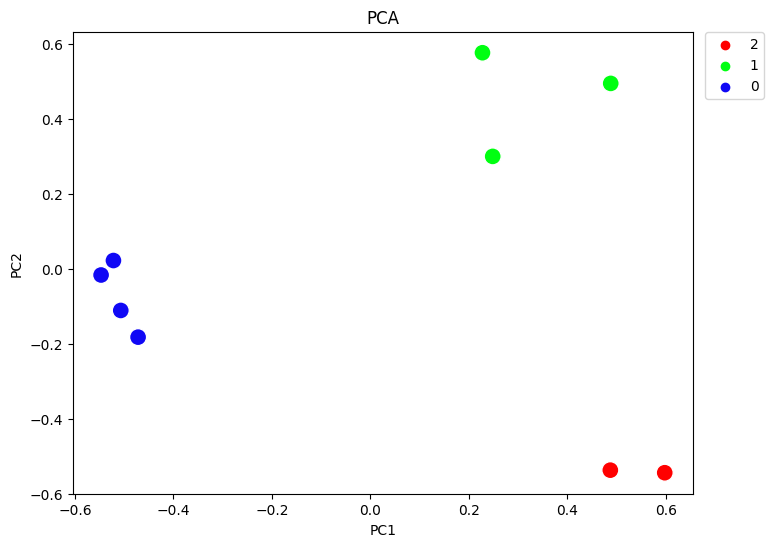

In [12]:
kmeans_final = KMeans(n_clusters=3, init='k-means++', n_init=5, random_state=0)
kmeans_final.fit(X_transformed[:, :2])

colors = ['#FF0000', '#00FF11', '#1008F5', '#C400FF']
sns.set_palette(sns.color_palette(colors))

fig, ax = plt.subplots(figsize = (8, 6))
sns.scatterplot(x = X_transformed[:, 0], y = X_transformed[:, 1], hue=[str(label) for label in kmeans_final.labels_], markers='o', s=150)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title('PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [13]:
df_results = df.copy(deep=True)
df_results['cluster'] = kmeans_final.labels_
df_results.head()

,Medium sand and above %,Fine sand %,Very fine sand %,Coarse silt %,Medium silt %,Fine silt %,Very fine silt %,Clay %,sand_total %,silt_total %,sand/silt,sand/clay,silt/clay,mean,std,median,skewness,kurtosis,cluster
0,0.310954,0.136023,0.000616,0.149574,0.074120,0.019095,0.055538,0.254081,0.447593,0.298327,1.500344,1.761616,1.174141,0.125,0.110884,0.105071,0.701053,-0.661566,2
1,0.091074,0.110094,0.536580,0.033612,0.022542,0.018718,0.019523,0.167858,0.737748,0.094395,7.815565,4.395084,0.562350,0.125,0.174797,0.062343,2.337610,5.798956,1
2,0.312426,0.102889,0.102459,0.084309,0.084309,0.061218,0.039738,0.212652,0.517775,0.269574,1.920717,2.434848,1.267677,0.125,0.091384,0.093384,1.552722,1.827374,2
3,0.149780,0.214191,0.368674,0.050097,0.031183,0.021470,0.034761,0.129844,0.732645,0.137512,5.327881,5.642520,1.059055,0.125,0.120263,0.089970,1.325357,1.458380,1
4,0.066137,0.061907,0.404560,0.033017,0.030953,0.039723,0.039208,0.324494,0.532604,0.142901,3.727076,1.641335,0.440382,0.125,0.149922,0.050815,1.496321,0.513469,0


### Cluster Characterization

In [14]:
# create dataframe to store stats 
kruskal_results = pd.DataFrame(columns=['variable', 'p_value'])

for n in df.columns:
    arrays = []
    # extract cluster arrays for the selected numerical variable 
    for c in np.unique(kmeans_final.labels_):
        arrays.append(df_results.loc[df_results['cluster']==c][n].values)
    
    # get kruskal stats 
    # let stat = statistics value, p = p_value
    stat, p = stats.kruskal(arrays[0], arrays[1], arrays[2])

    # store results 
    new_row = {'variable': n, 'p_value': p}
    kruskal_results = kruskal_results.append(new_row, ignore_index=True)

kruskal_results = kruskal_results.sort_values(by='p_value').reset_index(drop=True)


In [15]:
kruskal_results

,variable,p_value
0,Medium sand and above %,0.030197
1,median,0.030197
2,sand/silt,0.030197
3,Clay %,0.030197
4,sand_total %,0.042852
5,Fine sand %,0.047097
6,sand/clay,0.055023
7,Very fine silt %,0.063928
8,silt/clay,0.078954
9,silt_total %,0.086294


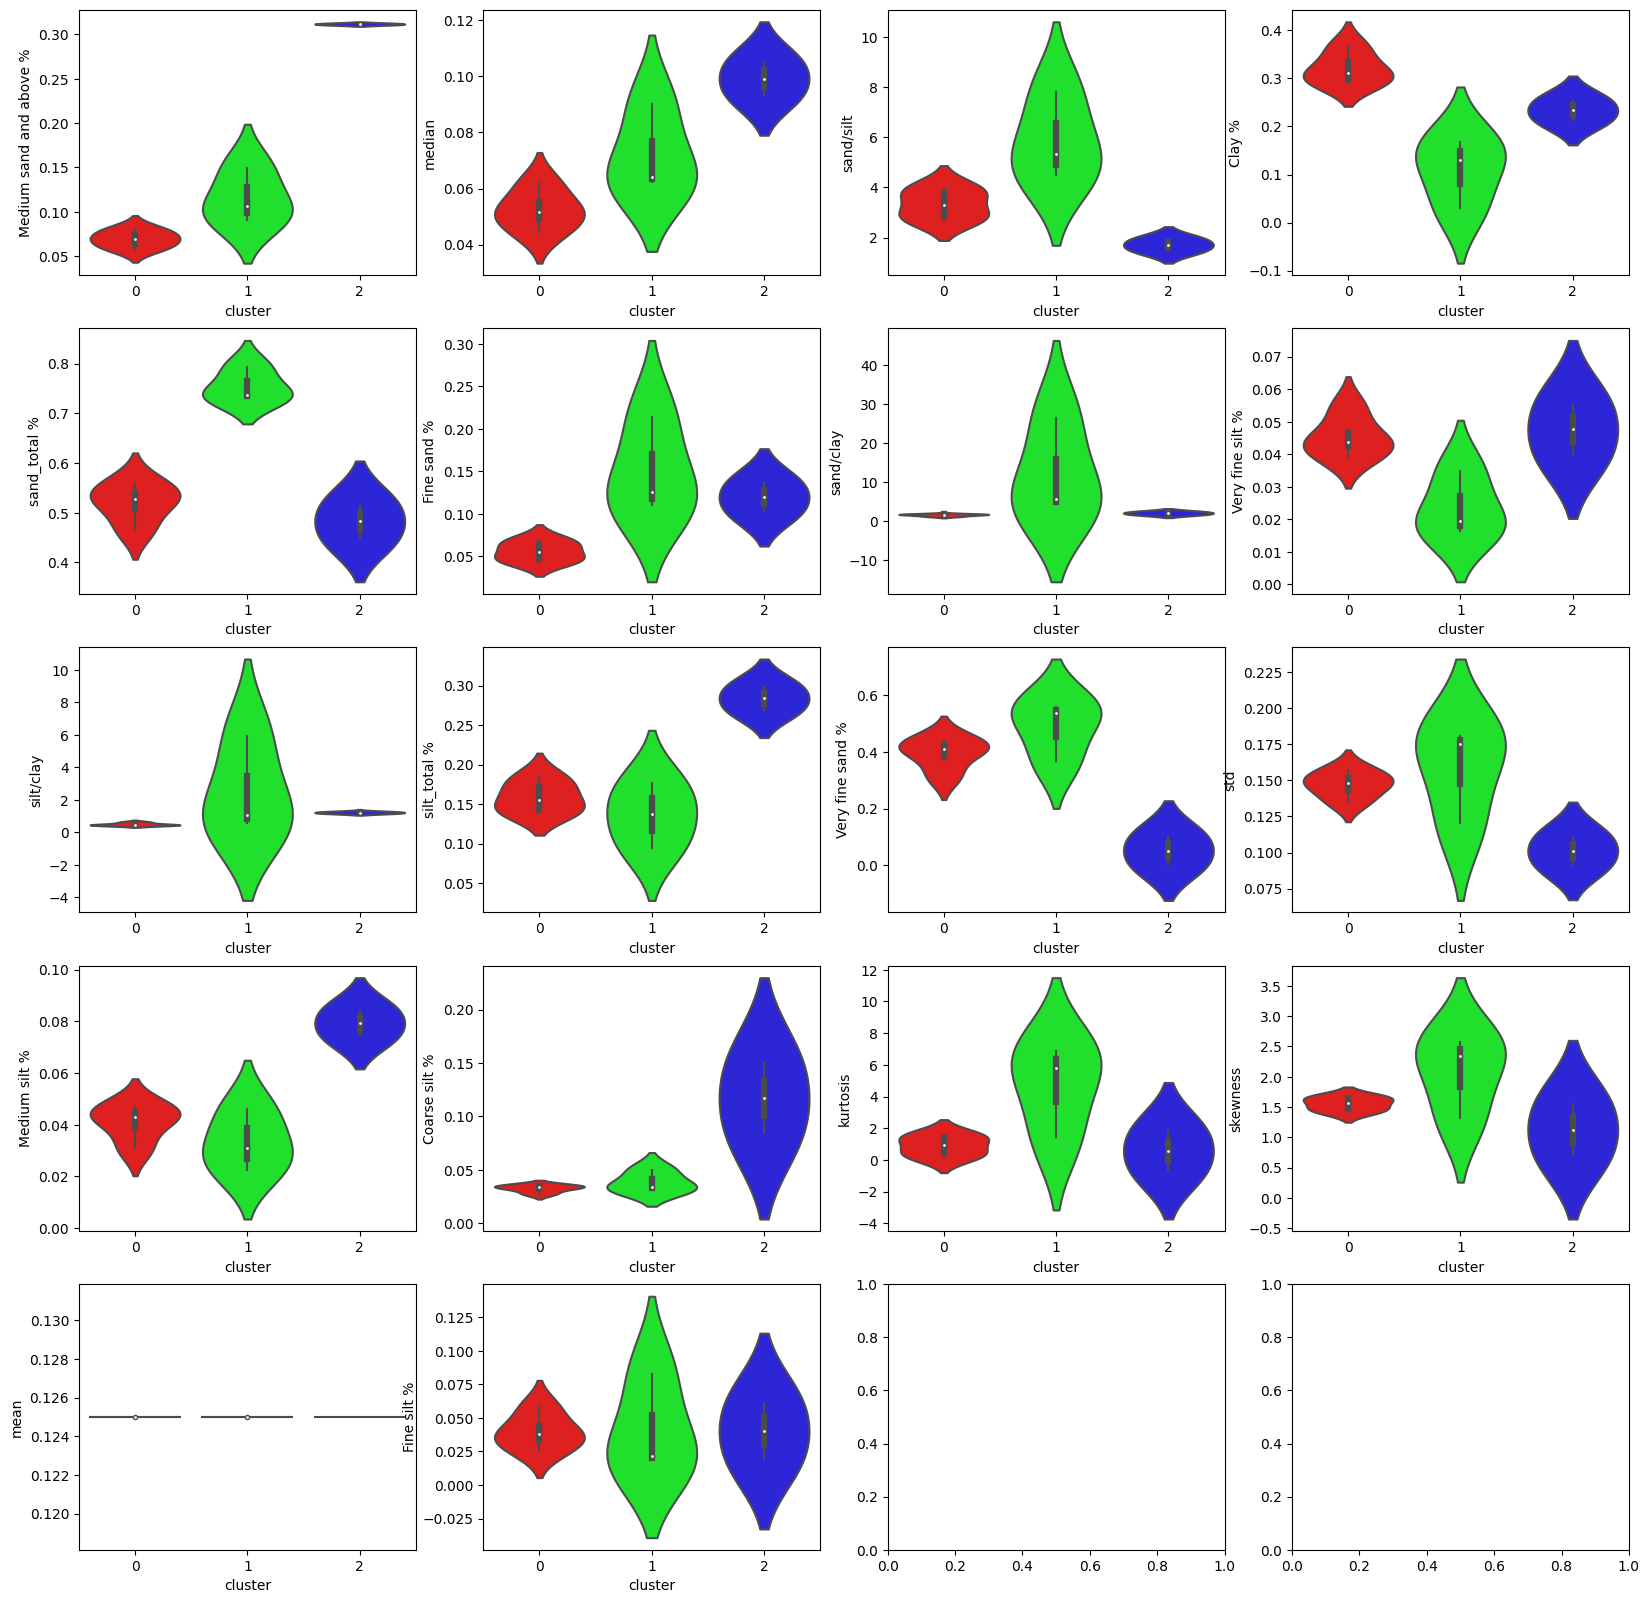

In [16]:
colors = ['#FF0000', '#00FF11', '#1008F5', '#C400FF']
sns.set_palette(sns.color_palette(colors))
fig, ax = plt.subplots(5, 4, figsize=(20, 20))
ax = ax.flatten()
i = 0
for var in kruskal_results['variable'].values:
    sns.violinplot(data = df_results, x = 'cluster', y = var, scale = 'width', inner="box", ax = ax[i])
    i += 1
plt.show()

In [17]:
colors = ['#FF0000', '#00FF11', '#1008F5']
df_results['cluster'] = df_results['cluster'].astype(str)
fig = px.scatter_ternary(
    df_results, a="sand_total %", b="Clay %", c="silt_total %",
    color="cluster", color_discrete_map={0:"red", 1: "green", 2: "blue"},
    color_discrete_sequence=colors
    )
fig.update_traces(marker=dict(size=12),
                  selector=dict(mode='markers'))
fig.show()

* scalability & reusability - as number of samples increase
* potential to integrate with geochemistry data, etc. to help identify facies
* potential as a predictive model for future samples
